# Tracking by growing a neural gas  (Unsupervised training)
This tutorial demonstrates the use of a Growing Neural Gas (GNG) network to learn the topology of an event as measured by the Delphi experiment at CERN. The data of the time projection chamber comprises 309 space points emanating from 22 tracks. Learning of the tracks happens in unsupervised mode ie. implicitely driven by the density of the measured space points without knowledge of ground truth.

Data files: event2.csv

We begin with the standard imports. This notebook uses pandas, matplotlib, and the [neupy](http://neupy.com/pages/home.html) GNG implementation:

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from neupy import algorithms, utils

W0812 13:31:36.978601 140501211993920 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


We first read the coordinates of the space points into a dataframe and plot the input data:

In [2]:
df = pd.read_csv('event2.csv',delim_whitespace=True)
print(df.head())

           x          y          z
0 -27.628780  28.757750 -57.172039
1 -27.907881  28.476280 -24.089720
2 -18.222811  35.782970  11.711950
3 -15.801570  36.892941  37.730850
4  -9.881391  38.777191  13.751660


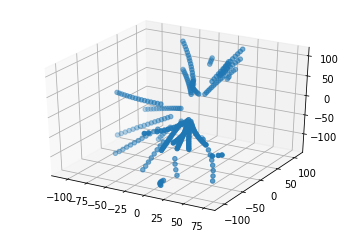

In [3]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'],df['y'],df['z'])

The network expects features in the range 0...1. As the input data is given in cm, we have to scale to meter.

In [4]:
data = df[['x','y','z']]*0.01

Define a function to instantiate the GNG network:

In [5]:
def create_gng(max_nodes, step=0.5, n_start_nodes=2, max_edge_age=15):
    return algorithms.GrowingNeuralGas(
        n_inputs=3,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=True,

        step=step,
        neighbour_step=0.05,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=10,
        after_split_error_decay_rate=0.1,
        error_decay_rate=0.995,
        min_distance_for_update=0.01,
    )

Define a function to draw the GNG network:

In [6]:
def draw_image(graph, show=True):
    
    fig = plt.figure(figsize=(10,7))
    ax = Axes3D(fig)

    for node_1, node_2 in graph.edges:
        x1 = node_1.weight.item(0)
        y1 = node_1.weight.item(1)
        z1 = node_1.weight.item(2)
        x2 = node_2.weight.item(0)
        y2 = node_2.weight.item(1)
        z2 = node_2.weight.item(2)
        ax.scatter(x1, y1, z1, c='black', s=20, edgecolors='k', alpha=0.7) # draw nodes
        ax.plot([x1,x2],[y1,y2],[z1,z2],zdir='z',c='black',label='gng')   # draw connections

    if show:
        ax.scatter(data['x'],data['y'],data['z'],c='gray',s=10) # draw data / features
        plt.show()

Train the GNG netowrk with the feature vectors (This might take some time, depending on your CPU power). Draw the GNG network for each iteration. 

W0812 13:31:59.266920 140501211993920 module_wrapper.py:137] From /home/marcel/anaconda3/lib/python3.7/site-packages/neupy-0.8.2-py3.7.egg/neupy/utils/misc.py:55: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.




Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.1
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 15
[OPTION] max_nodes = 308
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 3
[OPTION] n_iter_before_neuron_added = 10
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.5
[OPTION] verbose = True

#1 : [20 ms] train: 0.289920


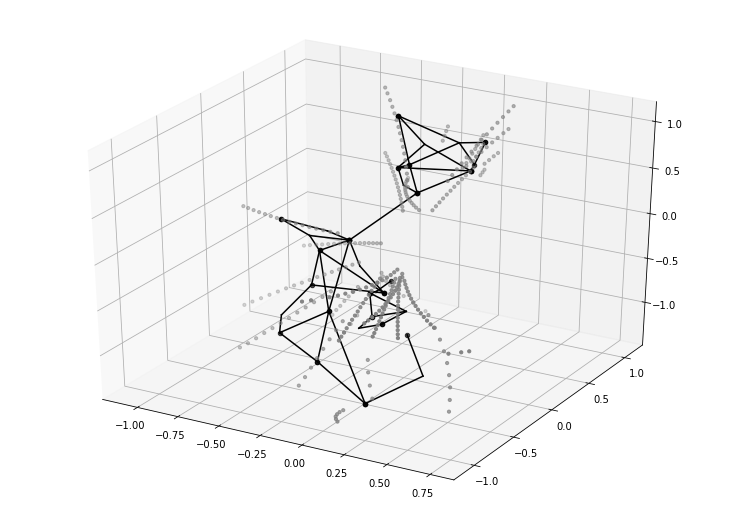

#2 : [28 ms] train: 0.136052


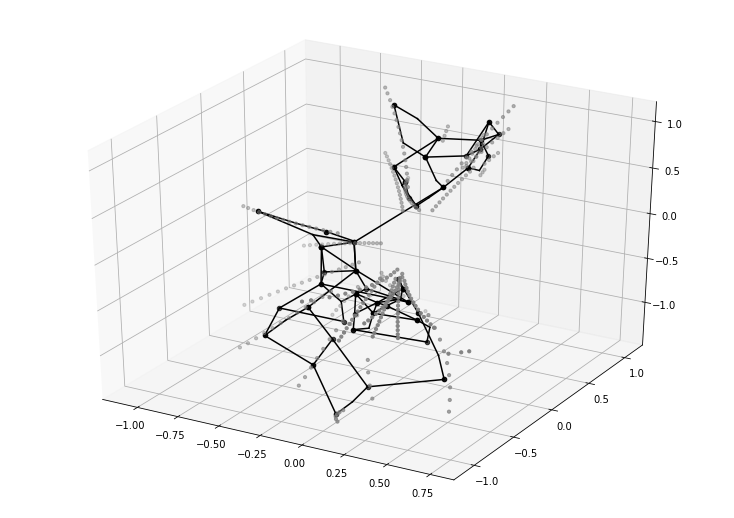

#3 : [34 ms] train: 0.092112


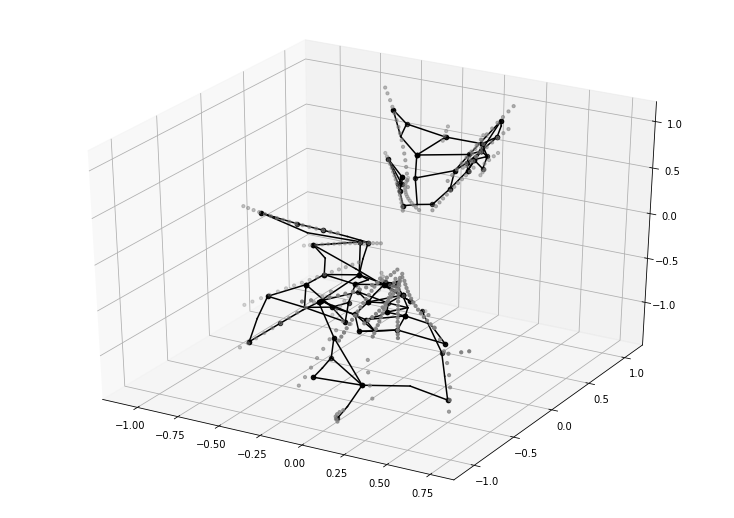

#4 : [41 ms] train: 0.068941


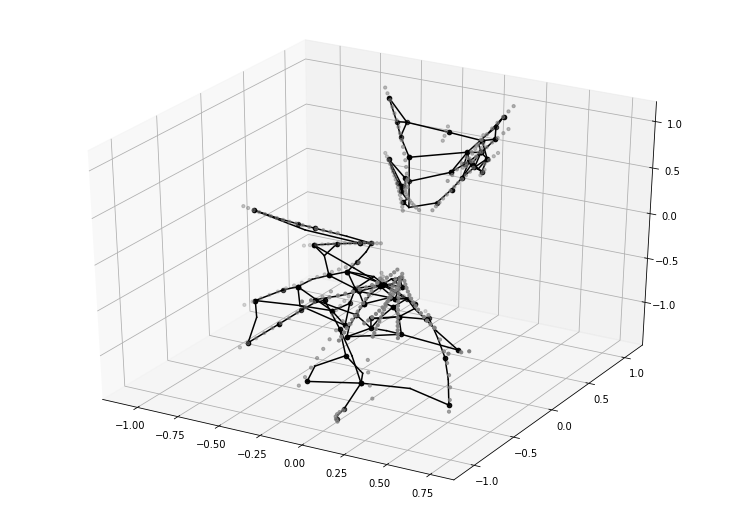

#5 : [46 ms] train: 0.056106


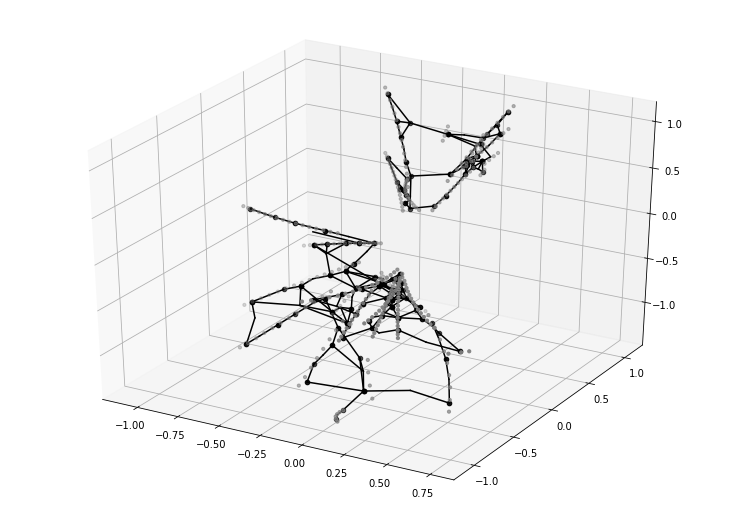

#6 : [52 ms] train: 0.047233


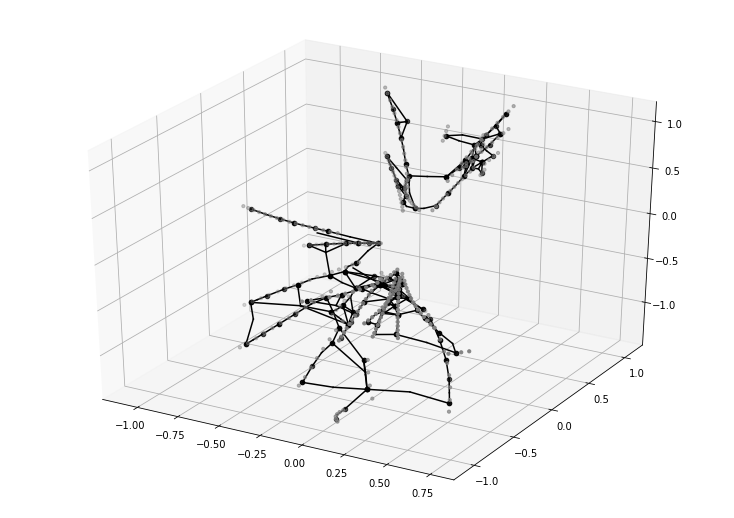

#7 : [60 ms] train: 0.039542


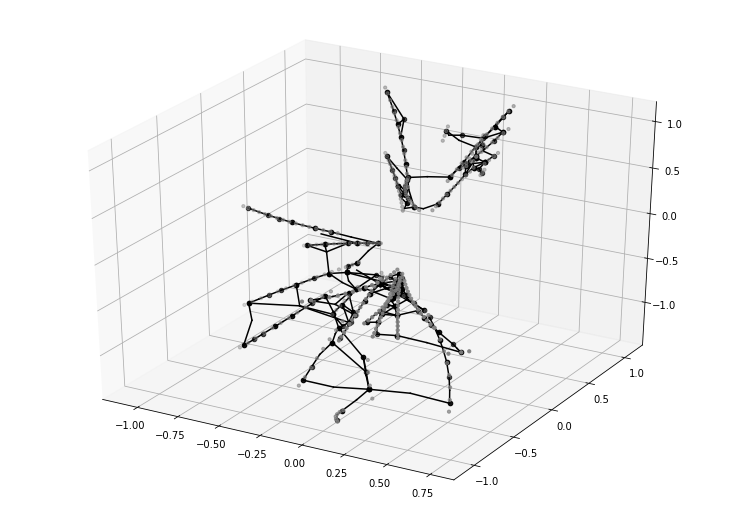

#8 : [67 ms] train: 0.032544


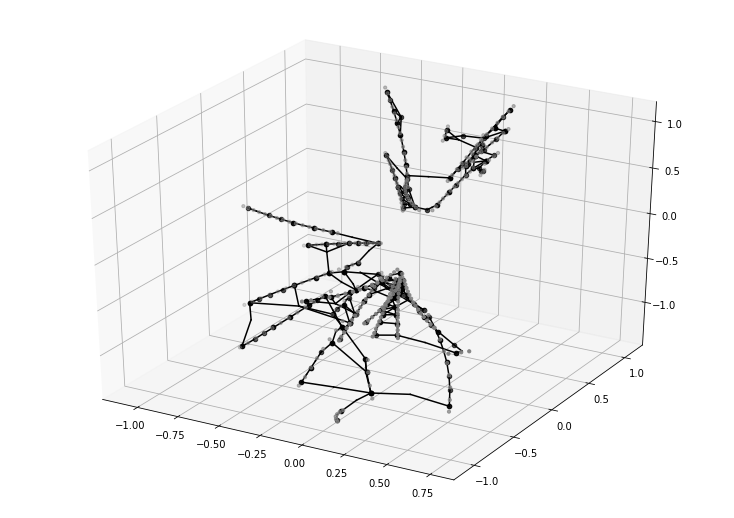

#9 : [96 ms] train: 0.026641


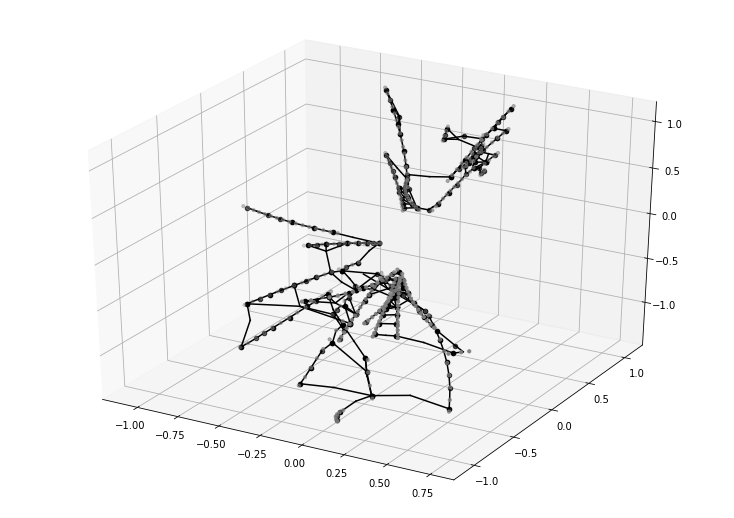

#10 : [95 ms] train: 0.020801


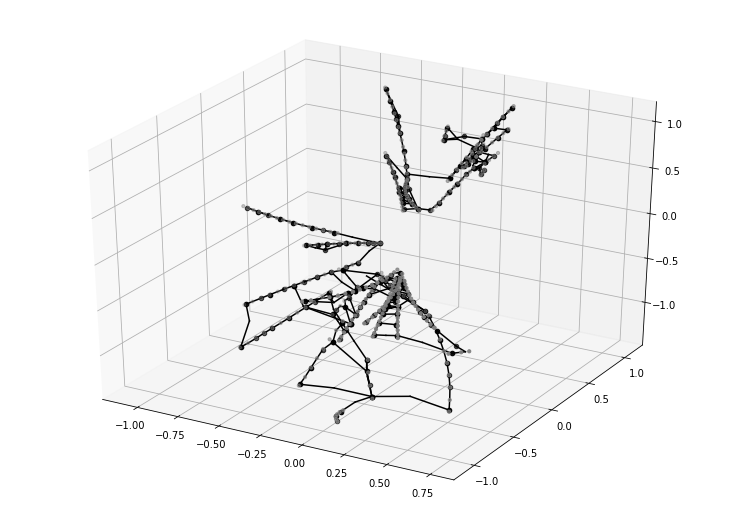

#11 : [94 ms] train: 0.016547


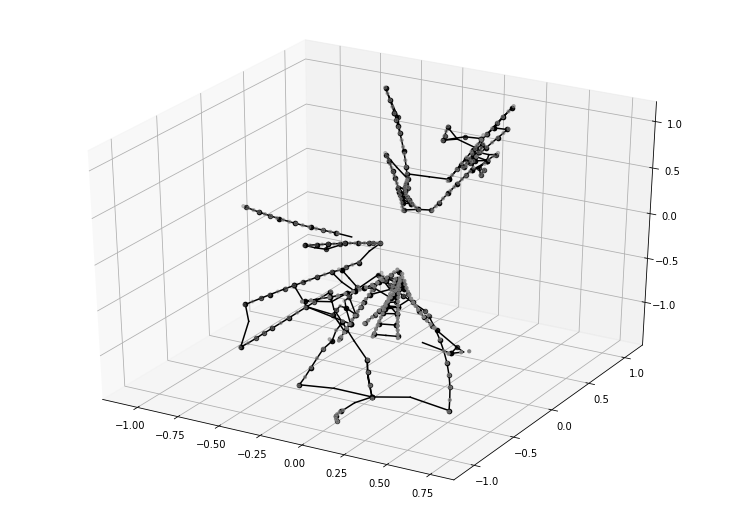

#12 : [99 ms] train: 0.013622


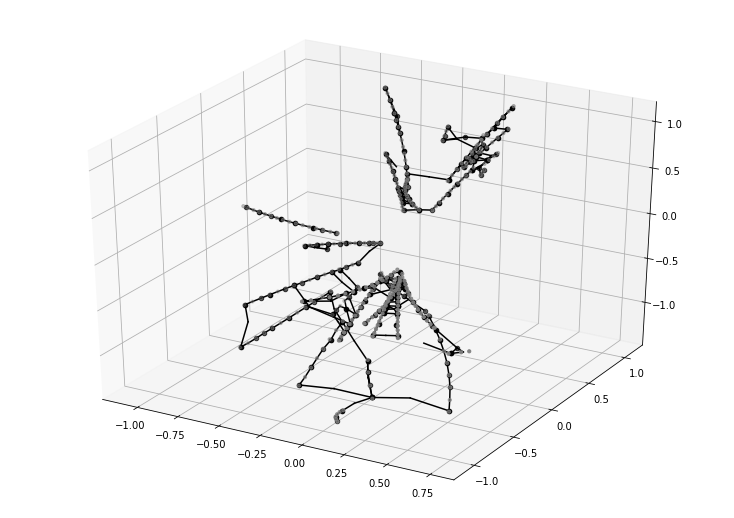

#13 : [99 ms] train: 0.012044


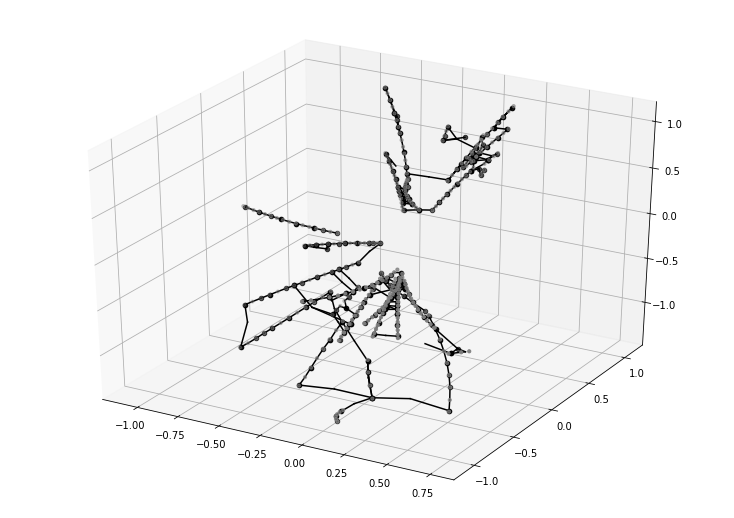

#14 : [93 ms] train: 0.010866


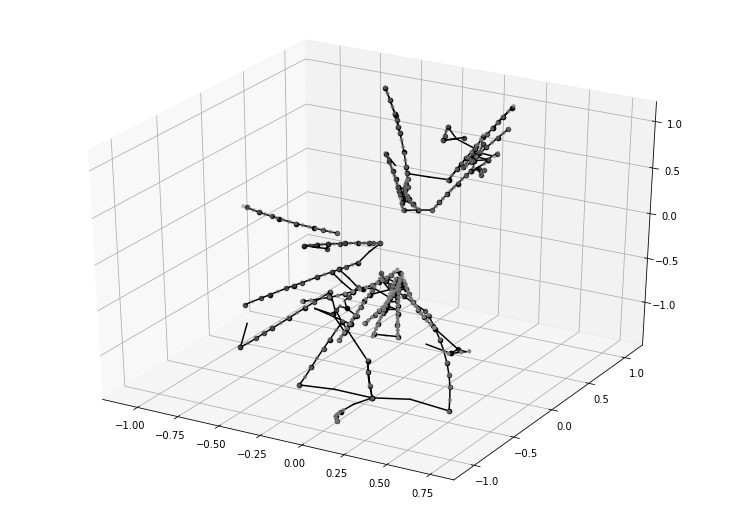

#15 : [100 ms] train: 0.010531


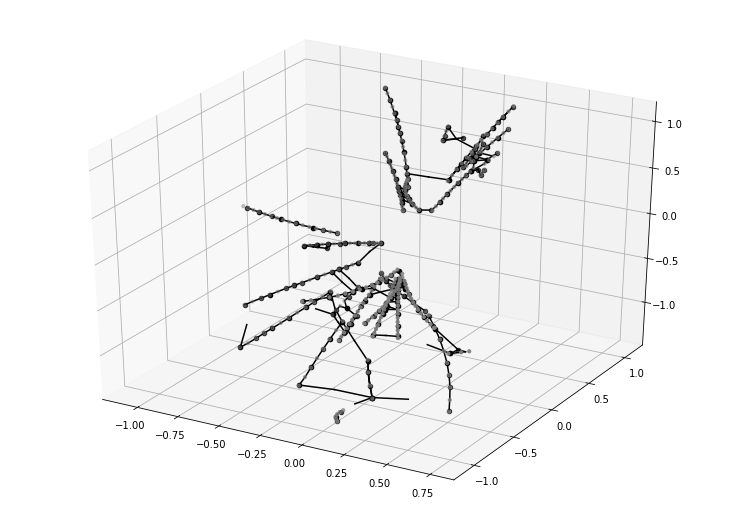

#16 : [98 ms] train: 0.009864


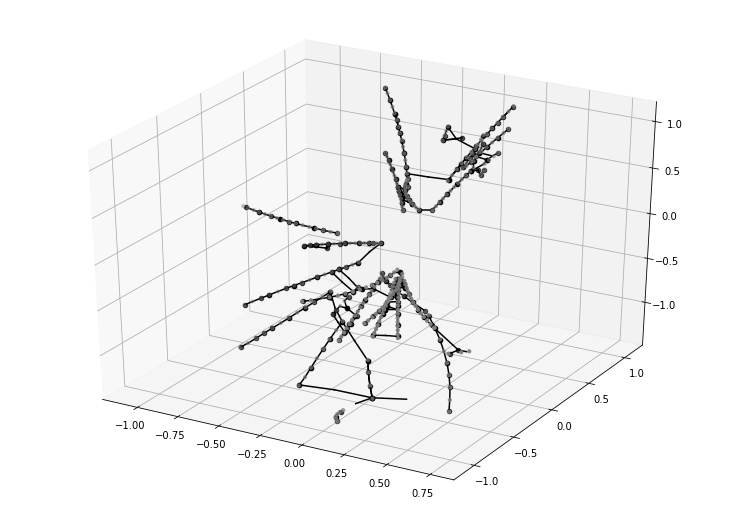

#17 : [141 ms] train: 0.009049


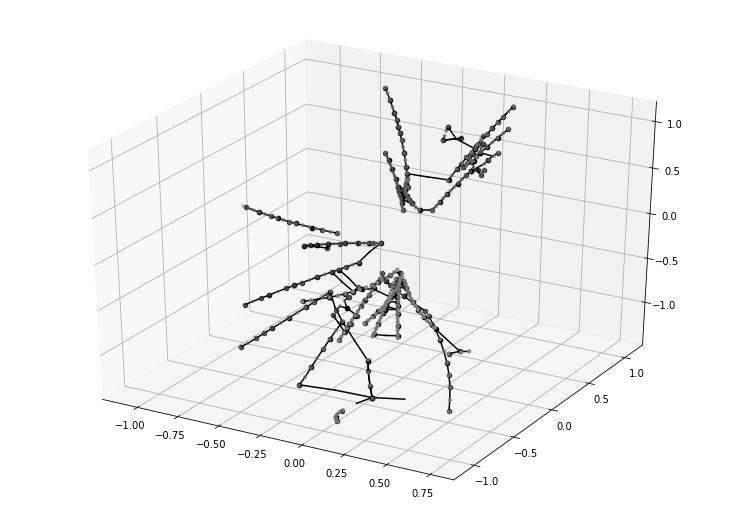

#18 : [322 ms] train: 0.008798


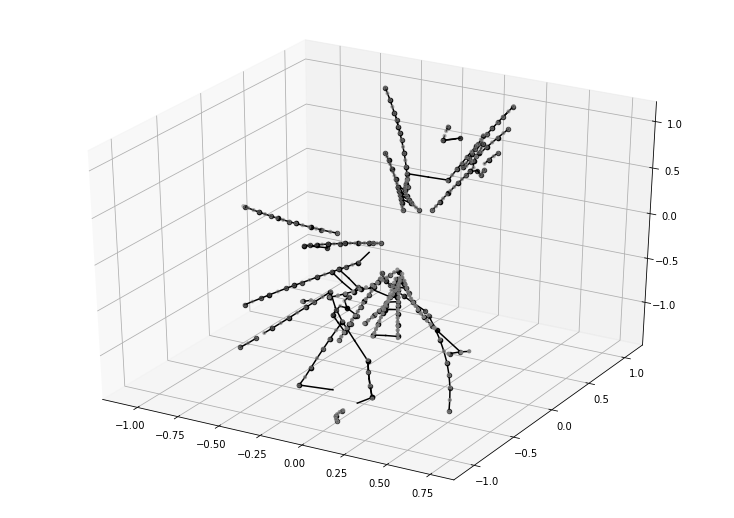

#19 : [171 ms] train: 0.008437


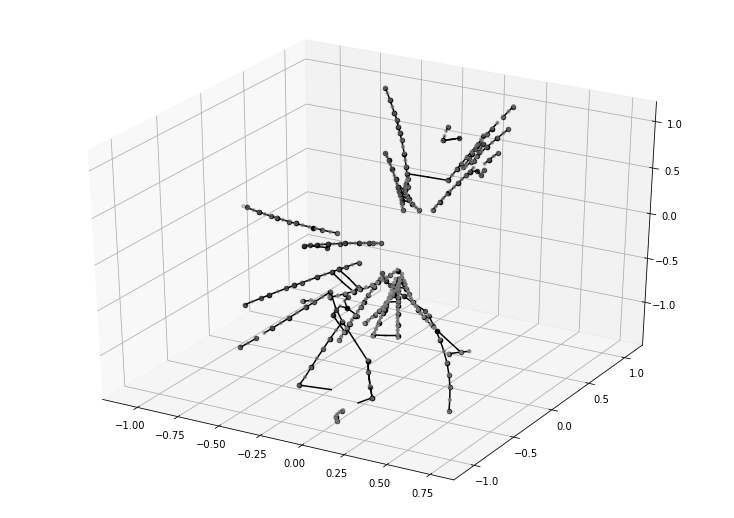

#20 : [141 ms] train: 0.007961


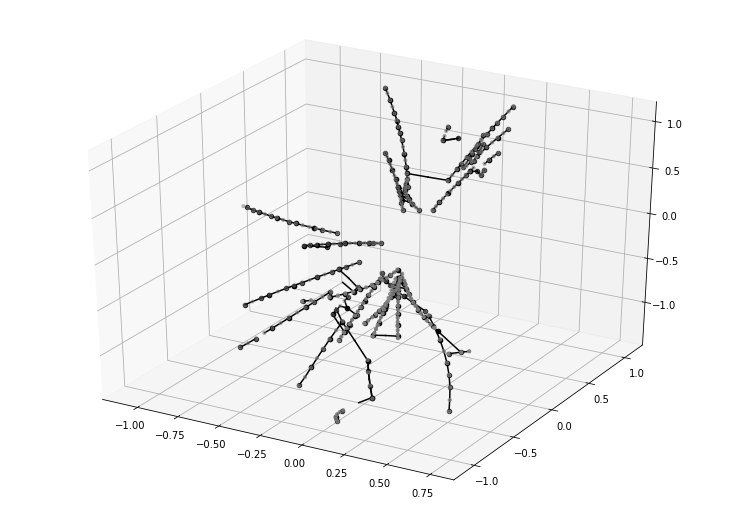

#21 : [116 ms] train: 0.007488


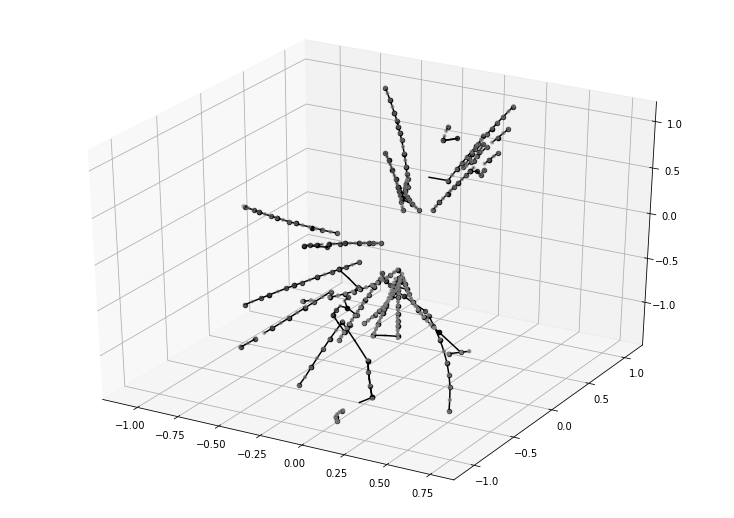

#22 : [99 ms] train: 0.007118


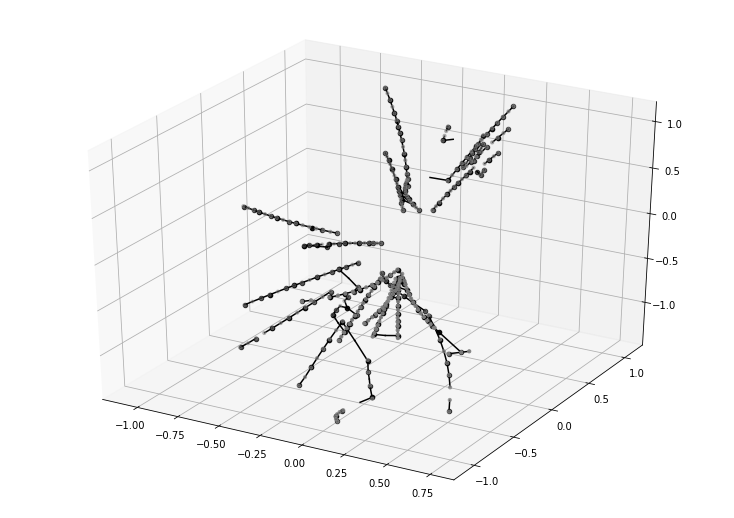

#23 : [98 ms] train: 0.007141


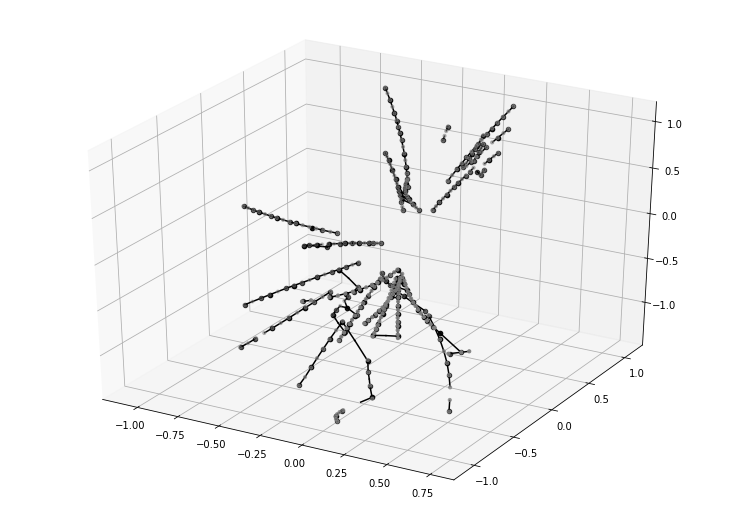

#24 : [88 ms] train: 0.006502


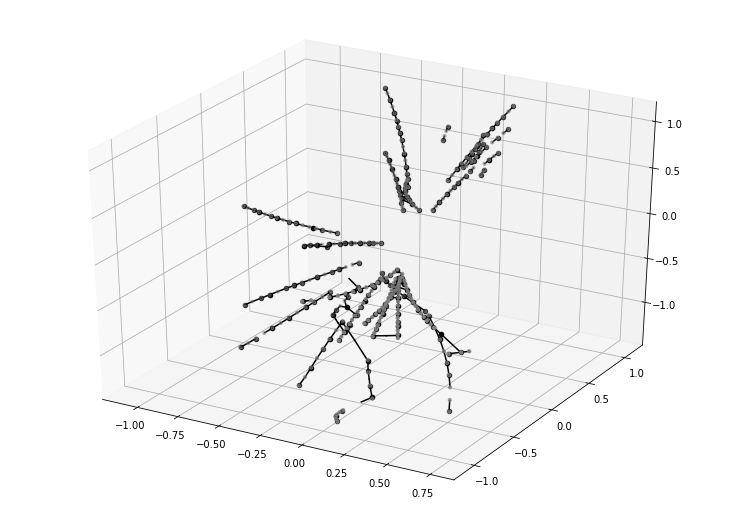

#25 : [88 ms] train: 0.006053


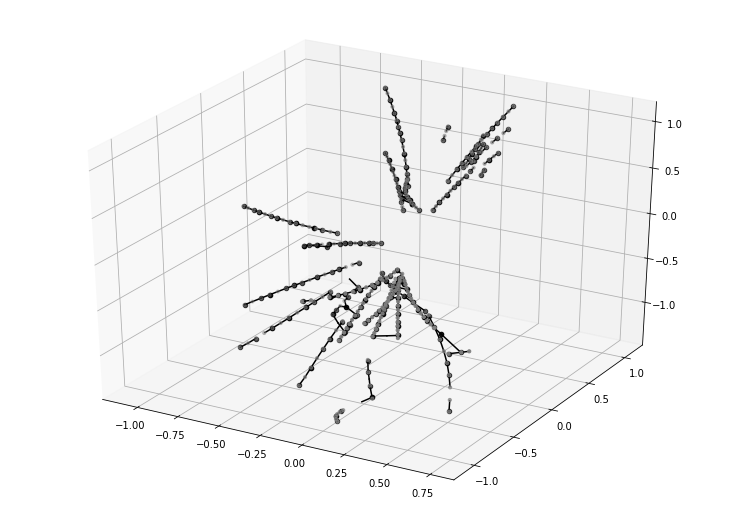

#26 : [99 ms] train: 0.005987


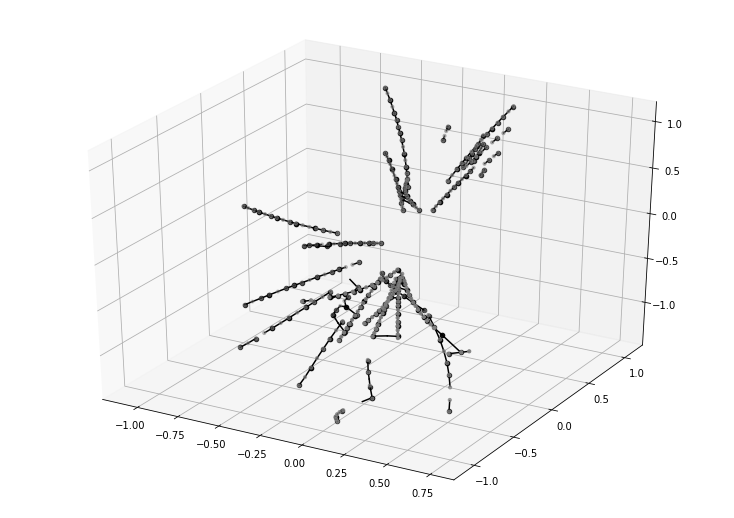

#27 : [142 ms] train: 0.005740


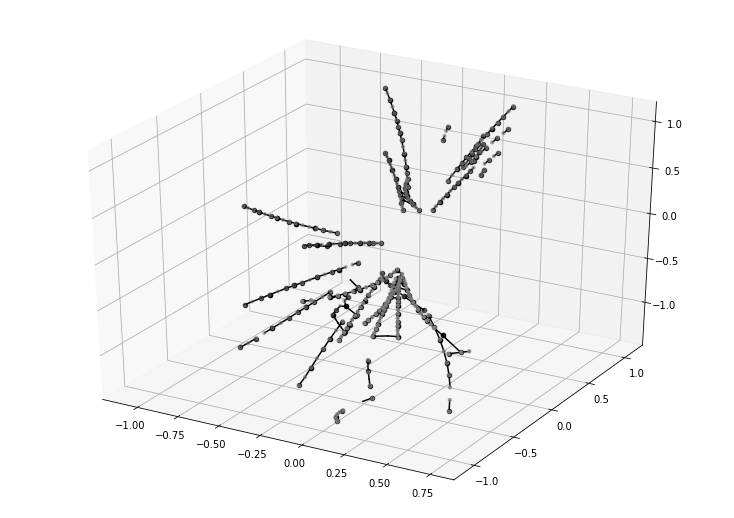

#28 : [117 ms] train: 0.005880


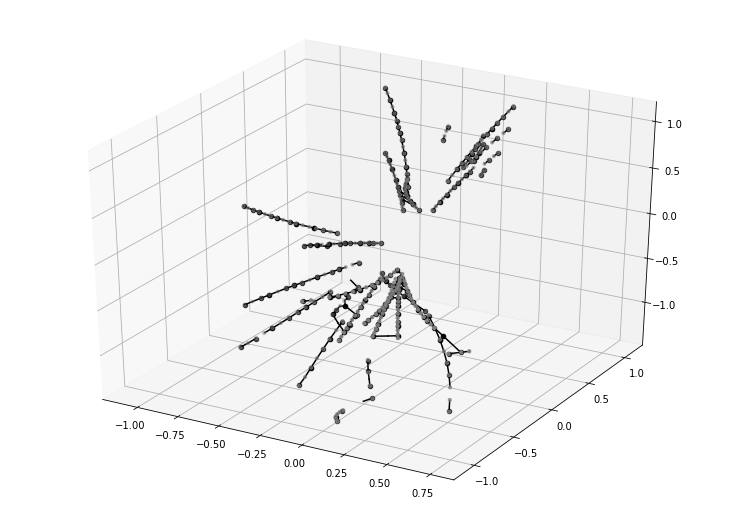

#29 : [100 ms] train: 0.005716


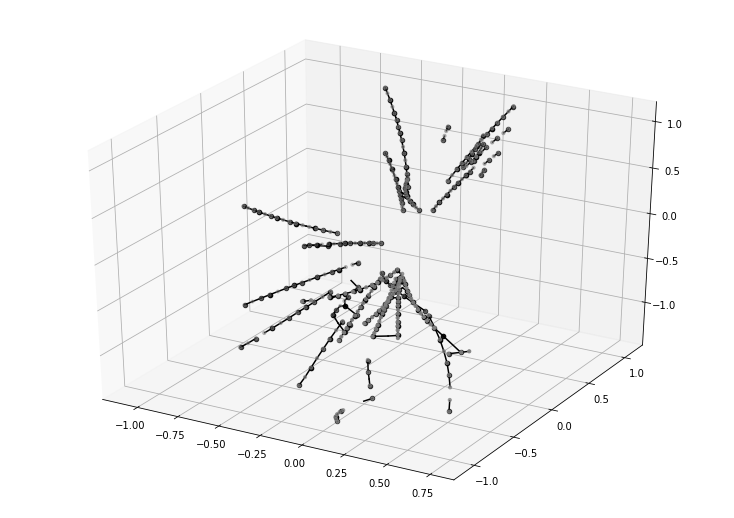

#30 : [99 ms] train: 0.005638


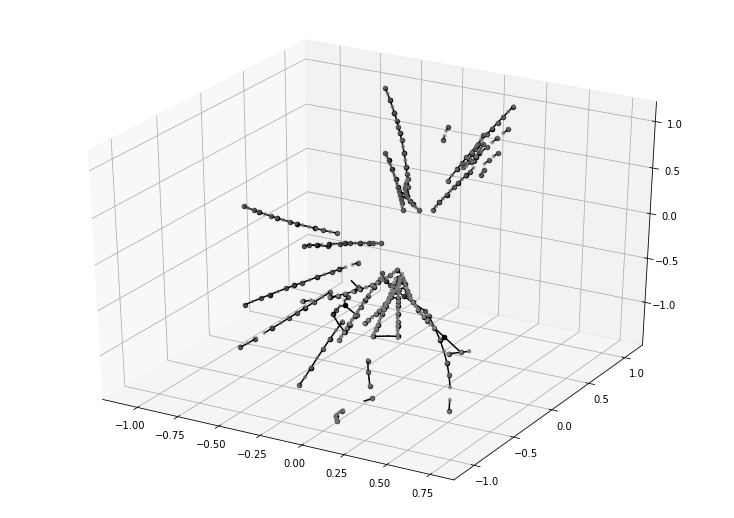

#31 : [88 ms] train: 0.005710


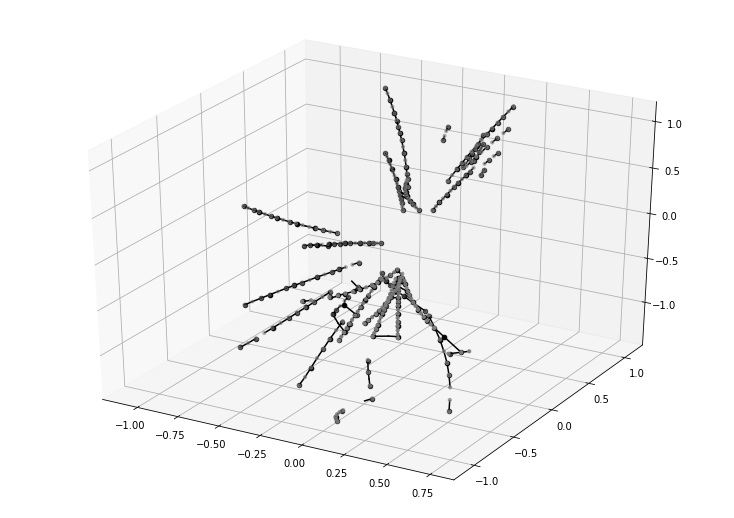

#32 : [88 ms] train: 0.005619


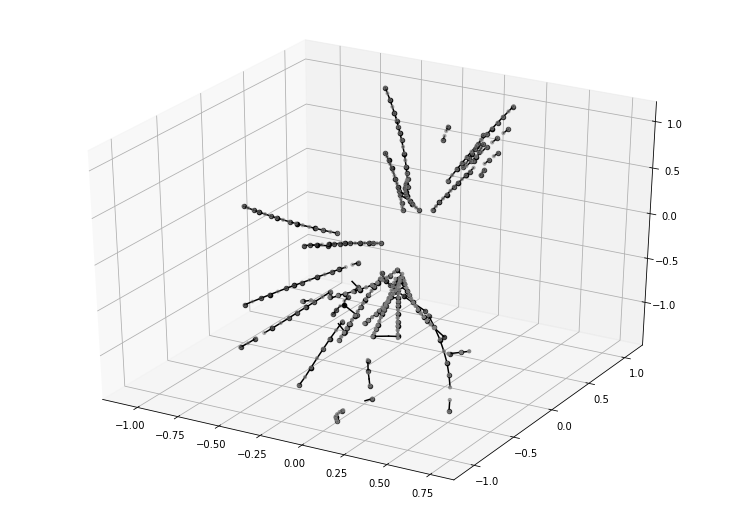

#33 : [97 ms] train: 0.005389


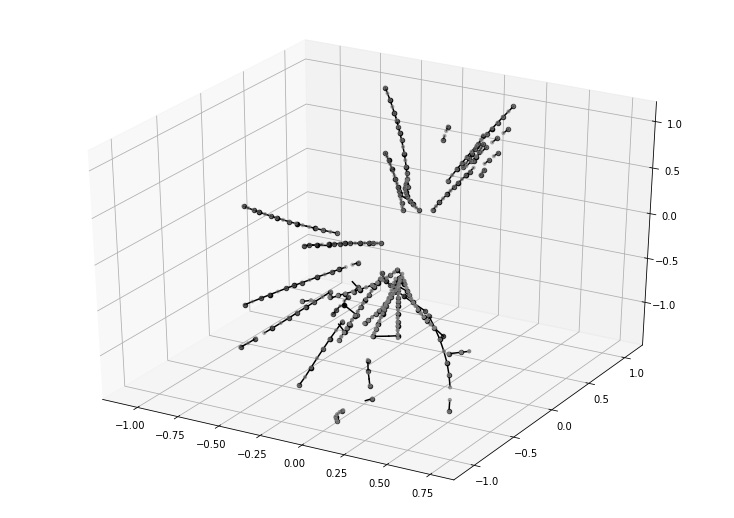

#34 : [142 ms] train: 0.005666


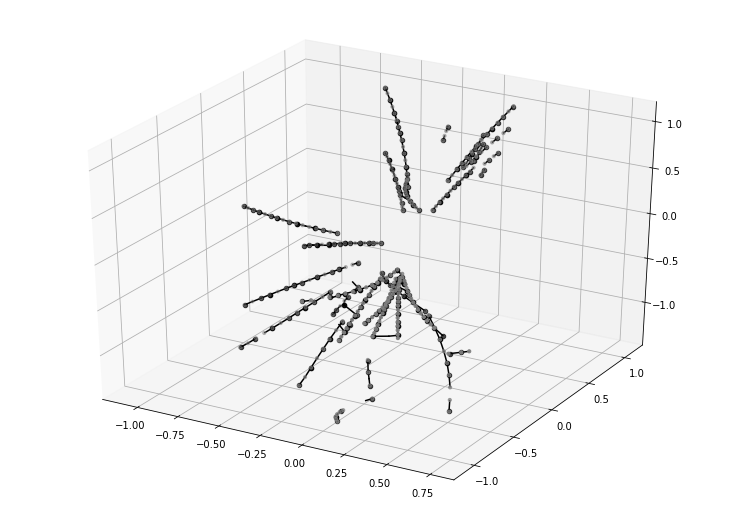

#35 : [244 ms] train: 0.005696


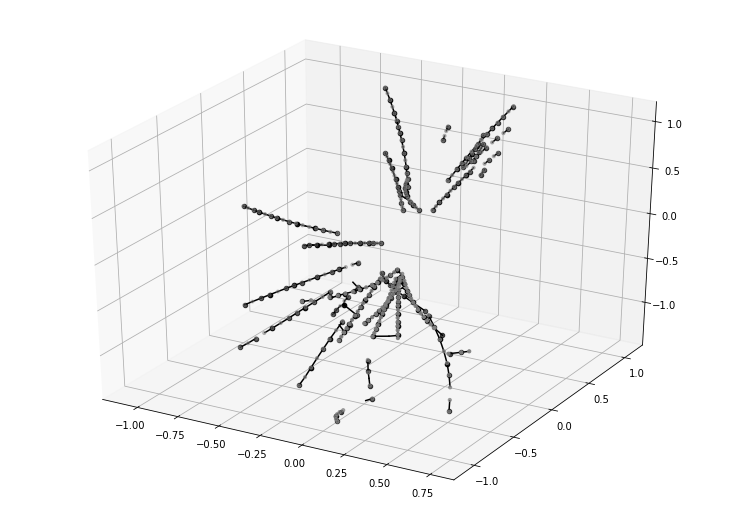

#36 : [331 ms] train: 0.005684


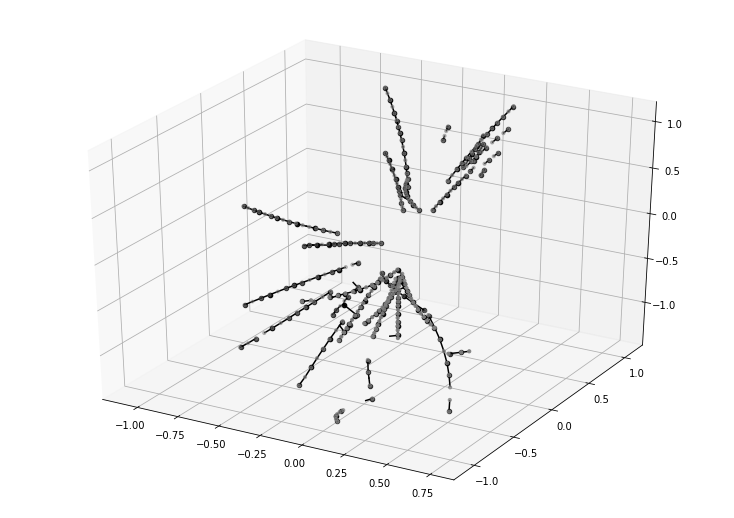

#37 : [228 ms] train: 0.005606


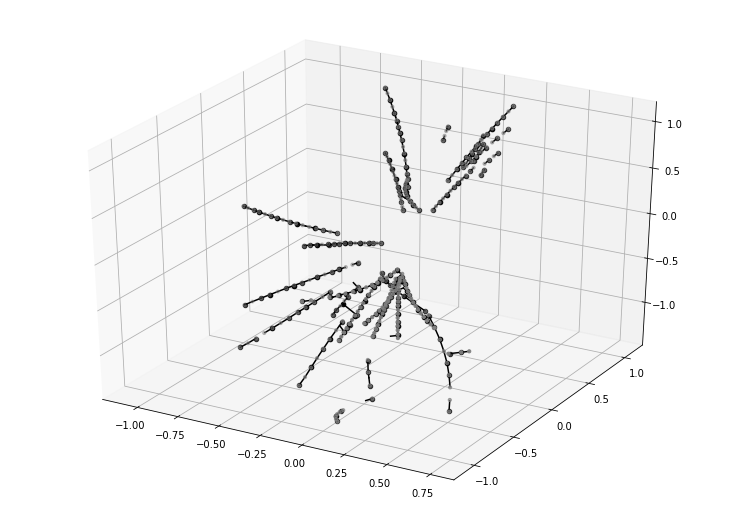

#38 : [169 ms] train: 0.005457


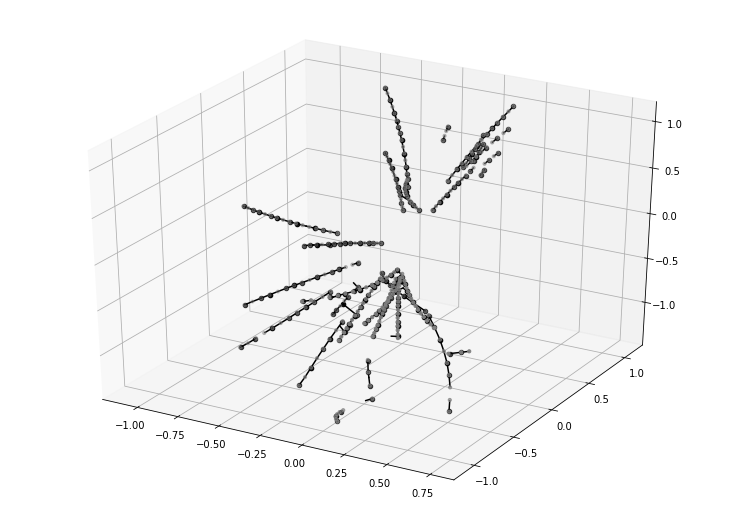

#39 : [141 ms] train: 0.005394


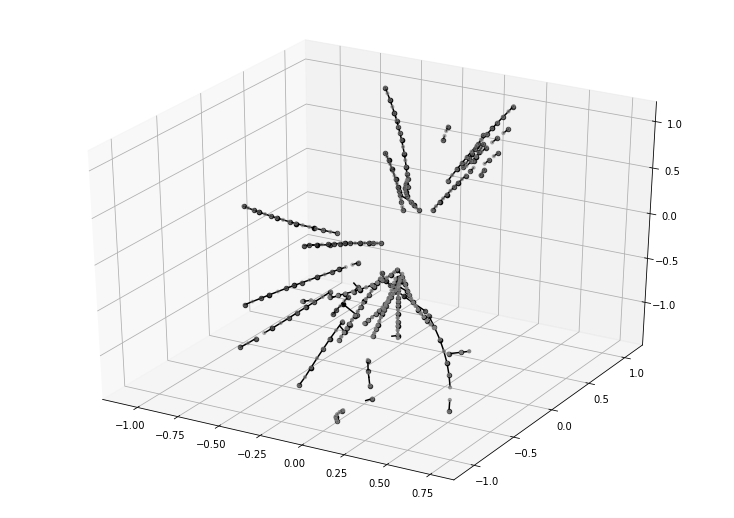

#40 : [117 ms] train: 0.005170


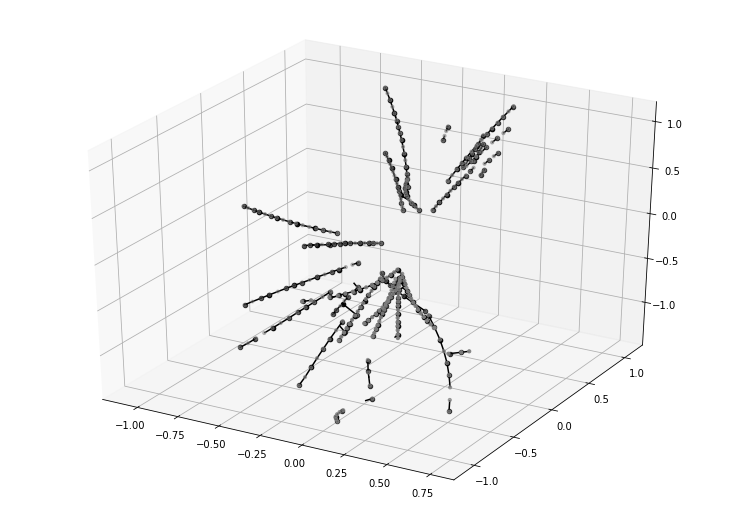

#41 : [98 ms] train: 0.005019


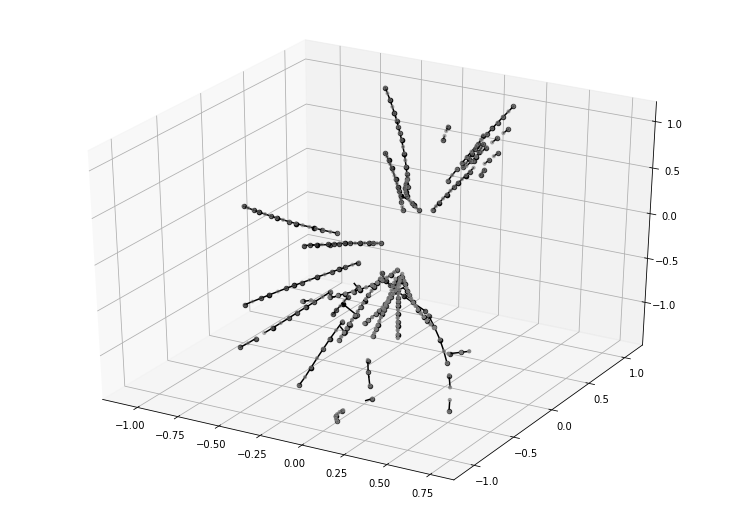

#42 : [99 ms] train: 0.005167


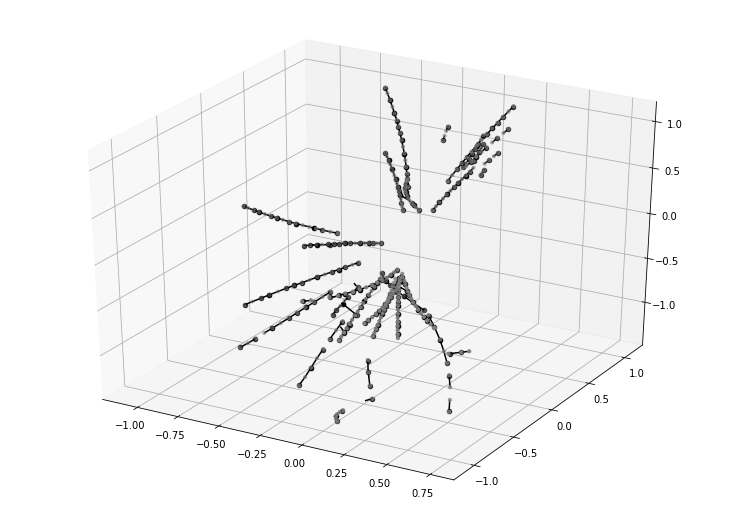

#43 : [87 ms] train: 0.005065


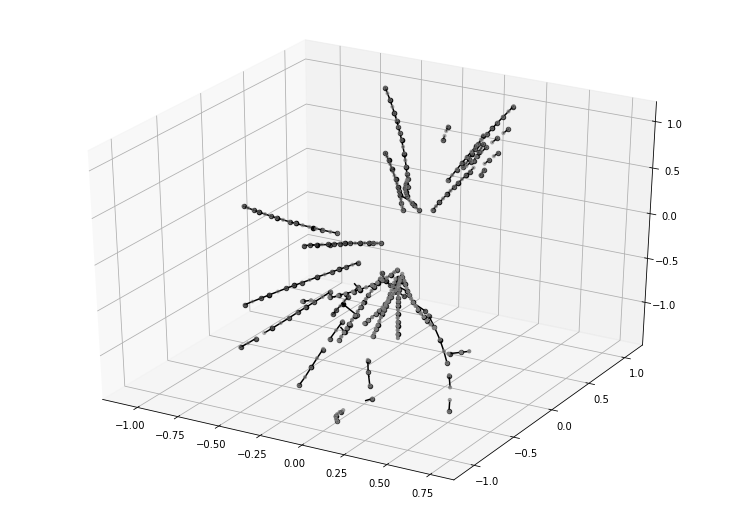

#44 : [87 ms] train: 0.005083


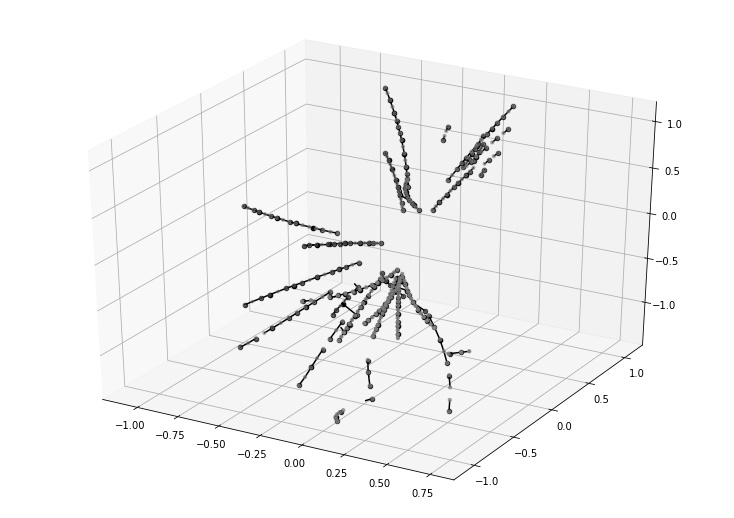

#45 : [97 ms] train: 0.004918


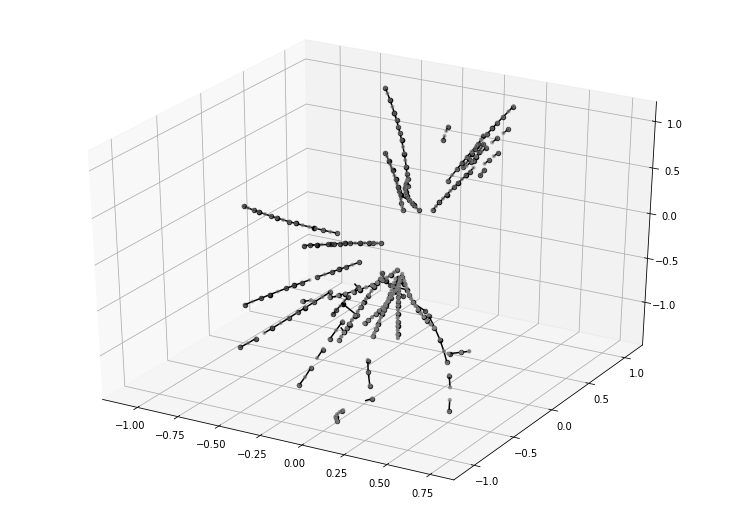

#46 : [140 ms] train: 0.005128


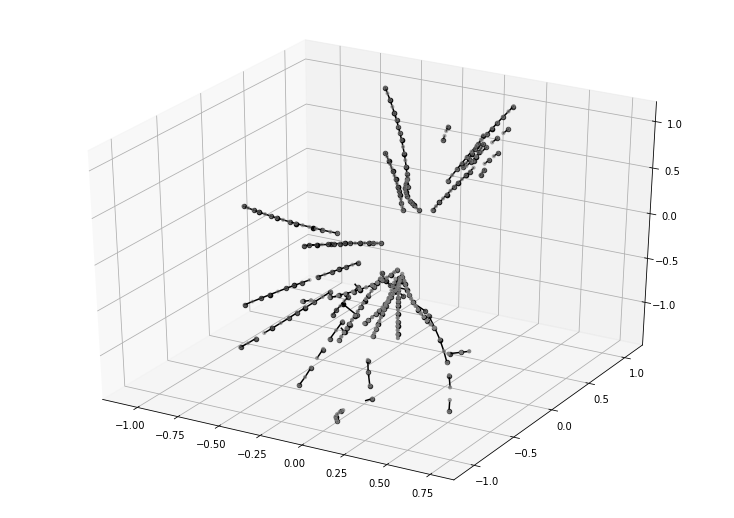

#47 : [116 ms] train: 0.005040


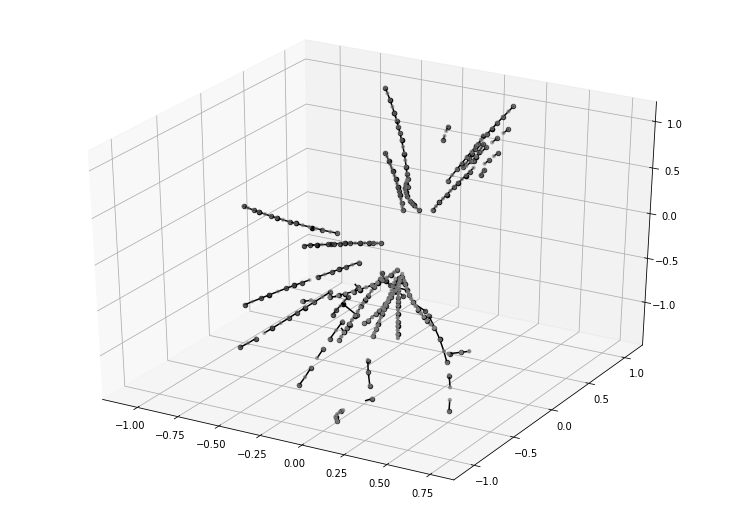

#48 : [115 ms] train: 0.005105


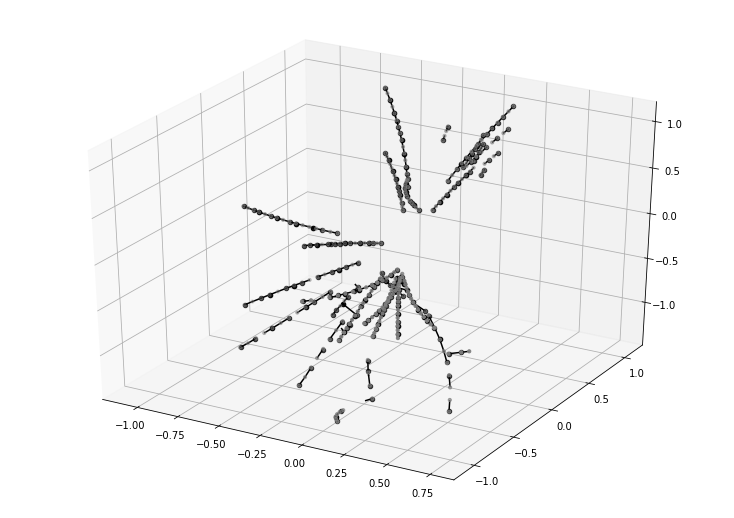

#49 : [97 ms] train: 0.005192


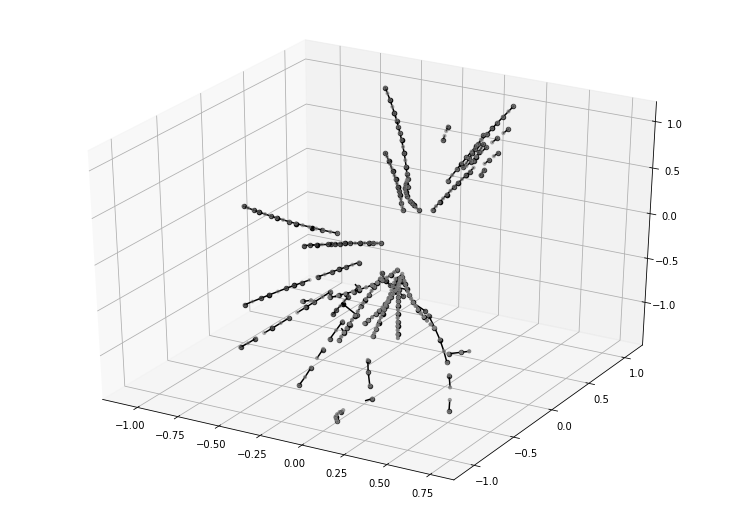

#50 : [117 ms] train: 0.005244


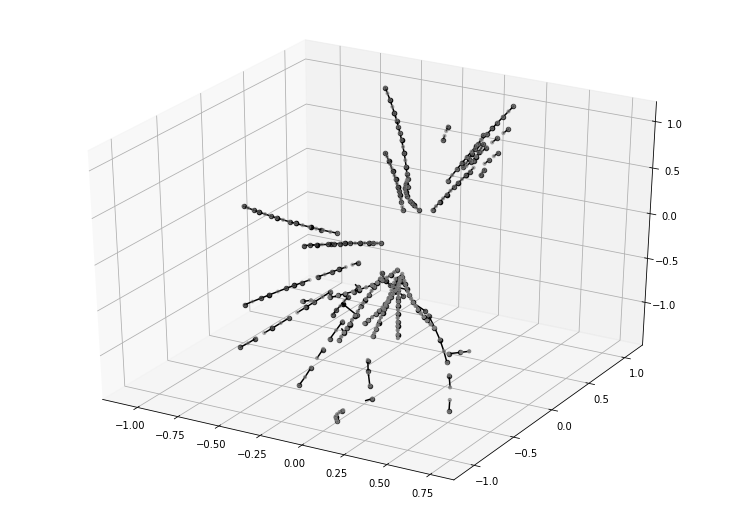

In [7]:
utils.reproducible()
gng = create_gng(max_nodes=308)

for epoch in range(50):
    gng.train(data, epochs=1)
    
    # Plot images after each iteration in order to see training progress
    draw_image(gng.graph)